In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
vn30f5m = pd.read_csv(r"../data/VN30F1M_5min_cleaned.csv",parse_dates=[0],index_col=0)

In [69]:
vn30f5m.head(5)

,open,close,high,low,eod_open_interest,volume,buy_volume,sell_volume,day_of_week,day_of_year,is_month_end,is_month_start,is_morning,est_trading_val,est_average,cum_sum_tradingval,cum_sum_volume,cum_buy_volume,cum_sell_volume
datetime,,,,,,,,,,,,,,,,,,,
2017-11-06 09:00:00,841.0,841.0,841.0,841.0,3336.0,1.0,1.0,0.0,0.0,310.0,0.0,0.0,1.0,841.00,841.00,841.00,1.0,1.0,0.0
2017-11-06 09:05:00,841.8,841.9,842.0,840.6,3336.0,438.0,358.0,80.0,0.0,310.0,0.0,0.0,1.0,368404.95,841.35,369245.95,439.0,359.0,80.0
2017-11-06 09:10:00,841.8,841.5,842.2,841.5,3336.0,269.0,167.0,102.0,0.0,310.0,0.0,0.0,1.0,226478.50,841.91,595724.45,708.0,526.0,182.0
2017-11-06 09:15:00,842.0,841.8,842.0,841.4,3336.0,201.0,55.0,146.0,0.0,310.0,0.0,0.0,1.0,169218.95,841.86,764943.40,909.0,581.0,328.0
2017-11-06 09:20:00,841.5,841.5,842.0,841.4,3336.0,472.0,244.0,228.0,0.0,310.0,0.0,0.0,1.0,397279.20,841.74,1162222.60,1381.0,825.0,556.0


Text(0.5, 1.0, 'VN30 Futures Prices at 5Min Interval')

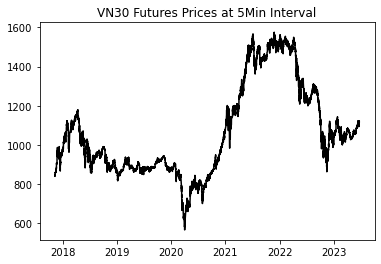

In [70]:
plt.plot(vn30f5m["close"], color = 'black')
plt.title("VN30 Futures Prices at 5Min Interval")

In [71]:
vn30f5m["close_diff_t1"] = vn30f5m["close"].diff()
vn30f5m["close_diff_pct_t1"] = vn30f5m["close"].pct_change()

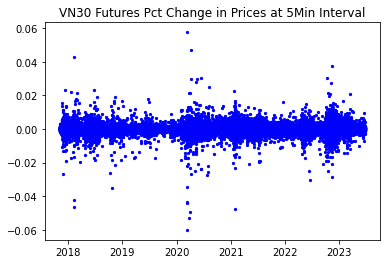

In [72]:
plt.scatter(vn30f5m.index, vn30f5m["close_diff_pct_t1"], marker='o', s=5, color='blue')
plt.title("VN30 Futures Pct Change in Prices at 5Min Interval")
plt.show()

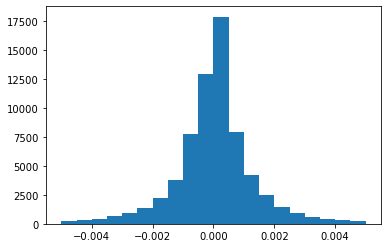

In [73]:
plt.hist(vn30f5m["close_diff_pct_t1"], bins = 20, range=(-0.005, 0.005))
plt.show()

### Plotting ACF, PACF and fitting ARIMA model

In [74]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

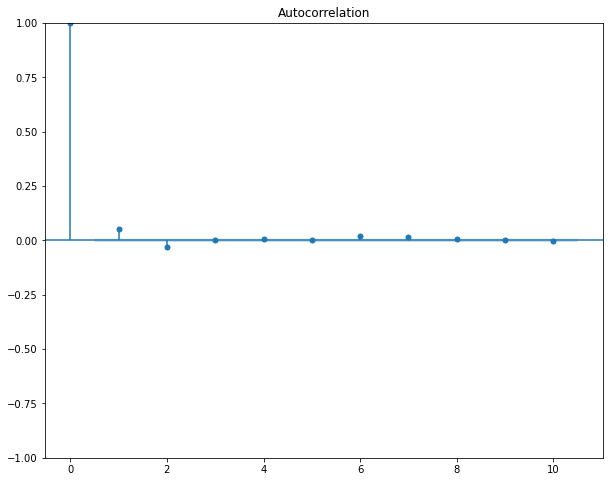

In [97]:
fig, ax1 = plt.subplots(1, figsize=(10,8))
plot_acf(vn30f5m["close_diff_t1"].dropna(), ax=ax1, lags=10);

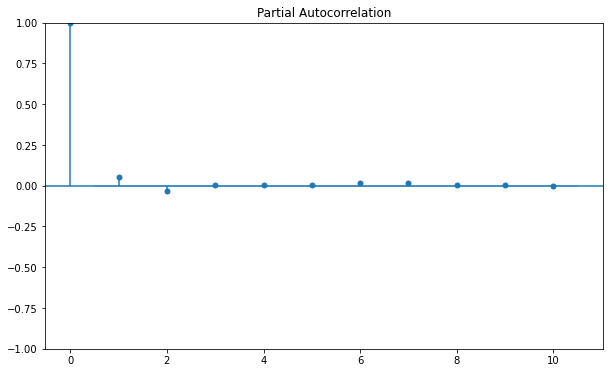

In [99]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
fig, ax1 = plt.subplots(1, figsize=(10,6))
plot_pacf(vn30f5m["close_diff_t1"].dropna(), ax=ax1, lags=10);

In [89]:
# Estimate the ARIMA differencing term based on Augmented Dickey-Fuller test

from pmdarima.arima.utils import ndiffs
diff_term = ndiffs(vn30f5m["close"].dropna(), test = "adf")
print("d in ARIMA should be", diff_term)

d in ARIMA should be 1


Estimating ARIMA model in (p, d, q) terms.
* p is the number of autoregressive terms; p can be found based on the cut-off point of PACF
* d is the number of nonseasonal differences; d is the number of differencing term.
* q is the number of lagged forecast errors in the prediction equation; q is based on cut-off point of ACF

In [92]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(vn30f5m["close"].values, order=(2, 1, 2))
result = model.fit()

print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                68953
Model:                 ARIMA(2, 1, 2)   Log Likelihood             -147442.585
Date:                Sat, 01 Jul 2023   AIC                         294895.170
Time:                        22:12:52   BIC                         294940.876
Sample:                             0   HQIC                        294909.277
                              - 68953                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0688      0.125     -0.548      0.583      -0.315       0.177
ar.L2         -0.0579      0.065     -0.885      0.376      -0.186       0.070
ma.L1          0.1221      0.125      0.974      0.3

In [101]:
from sklearn import metrics

mse = np.sqrt(metrics.mean_squared_error(vn30f5m["close"], result.fittedvalues))
mae = metrics.mean_absolute_error(vn30f5m["close"], result.fittedvalues)

print("The mean squared error is:", mse)
print("The mean absolute error is:", mae)

The mean squared error is: 3.8043386460592843
The mean absolute error is: 1.1510200601603193


### Merging with VN30 Data

In [103]:
merged = vn30.merge(vn30f5m, how='left', left_index=True, right_index=True)

In [105]:
merged = merged.dropna(axis=0, how='any')

In [106]:
merged.head(5)

,symbol,raw_date,open_x,close_x,high_x,low_x,open_interest,volume_x,buy_volume_x,sell_volume_x,...,is_month_start,is_morning,est_trading_val,est_average,cum_sum_tradingval,cum_sum_volume,cum_buy_volume,cum_sell_volume,close_diff_t1,close_diff_pct_t1
datetime,,,,,,,,,,,,,,,,,,,,,
2020-12-30 09:20:00,VN30,20201230 09:19:57,1062.44,1062.43,1062.48,1062.10,0.0,838820.0,0.0,0.0,...,0.0,1.0,3022148.05,1069.40,9065448.40,8488.0,5632.0,2856.0,1.7,0.001591
2020-12-30 09:25:00,VN30,20201230 09:24:58,1064.04,1063.76,1064.04,1063.71,0.0,2108590.0,0.0,0.0,...,0.0,1.0,3058377.95,1070.80,12123826.35,11344.0,7110.0,4234.0,0.2,0.000187
2020-12-30 09:30:00,VN30,20201230 09:29:49,1063.80,1063.84,1063.85,1063.62,0.0,1091320.0,0.0,0.0,...,0.0,1.0,3234235.50,1071.29,15358061.85,14363.0,8772.0,5591.0,1.2,0.001121
2020-12-30 09:35:00,VN30,20201230 09:34:57,1064.43,1064.25,1064.47,1064.25,0.0,1087000.0,0.0,0.0,...,0.0,1.0,1641726.30,1071.62,16999788.15,15895.0,9926.0,5969.0,-0.3,-0.000280
2020-12-30 09:40:00,VN30,20201230 09:39:58,1064.38,1064.59,1064.59,1064.38,0.0,316610.0,0.0,0.0,...,0.0,1.0,1857521.10,1071.26,18857309.25,17629.0,10887.0,6742.0,0.5,0.000467


Text(0.5, 1.0, 'Correlation: 0.9994398957718056')

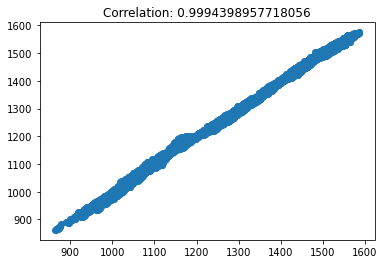

In [107]:
plt.scatter(merged['close_x'], merged['close_y'])
plt.title(f"Correlation: {merged['close_x'].corr(merged['close_y'])}")

In [108]:
merged["diff_basis"] = merged["close_x"] - merged["close_y"]

2.384391816238592

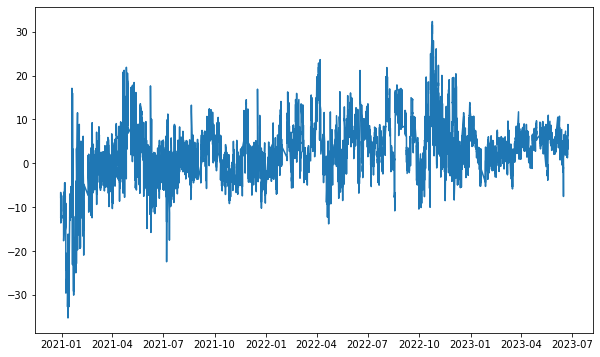

In [109]:
plt.figure(figsize=(10, 6))
plt.plot(merged["diff_basis"])

merged["diff_basis"].mean()

Plotting both VN301FM and VN30 on the same graph for June 2023 maturity (from May 19 to June 15)

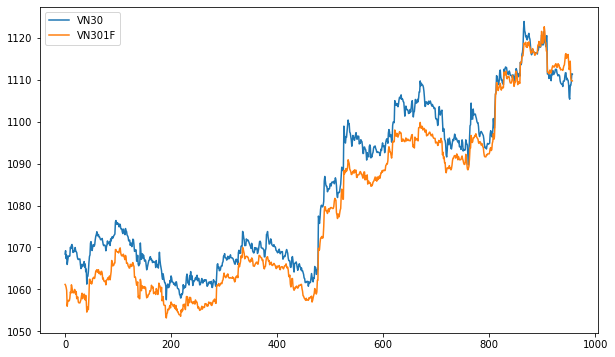

In [111]:
plt.figure(figsize=(10, 6))

time_frame = merged.loc["2023-05-19":"2023-06-15"]

plt.plot(time_frame['close_x'].values, label = "VN30")
plt.plot(time_frame['close_y'].values, label = "VN301F")

plt.legend()
plt.show() 

In [112]:
merged['contango'] = np.where(merged['diff_basis'] < 0, 1, 0)

In [113]:
merged['contango'].value_counts()

contango
0    19706
1     9767
Name: count, dtype: int64